# Example Simulation

In [2]:
import matplotlib.pyplot as plt
from MatingTypeModel import Model, get_distr_normal

## Setting parameters and initialising simulation
The model takes the following optional keyword arguments (default values defined in `MatingTypeModel.py` otherwise)
- `m0` : initial number of mating types
- `c` : clonal reproduction rate
- `distr_r` : relative fitness distribution for mutant mating types
- `r0` : initial fitness values of initial mating types

In [3]:
n_mut_max = 30  # max number of mutations
model1 = Model(distr_r=get_distr_normal(mean=0,variance=0))
model2 = Model()

## Main loop

In [4]:
m1 = []
m2 = []

for i in range(n_mut_max):
    model1.get_fixedPoint_stable()
    model2.get_fixedPoint_stable()
    
    m1.append(model1.data()['m'])
    m2.append(model2.data()['m'])
    
    model1.mutate()
    model2.mutate()
    
#print(model1.data())  # view data stored for this simulation

## Plot

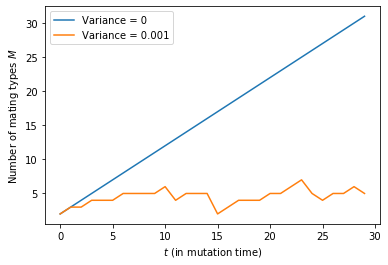

In [8]:
fig, ax = plt.subplots()
ax.set_ylabel(r'Number of mating types $M$');
ax.set_xlabel(r'$t$ (in mutation time)');

ax.plot(m1, label=r'Variance = 0');
ax.plot(m2, label=r'Variance = 0.001');

ax.legend();

plt.show()

Timeseries for the number of mating types with
- No fitness differences
- Small fitness differences (normally distributed)

## Other fitness distributions
The example above uses a normal distribution for the mutant fitness values. For other distributions define a function that takes an integer `n` as argument and returns `n` values drawn from the distribution. Then feed the function as `distr_r` keyword argument when initialising an instance of `Model`. Use a wrapper function to set distribution parameters (see examples below).

In [7]:
# Normal distribution
def get_distr_normal(mean, variance):
    
    def distr_normal(n):
        return np.random.normal(mean, scale=np.sqrt(variance), size=n)
    
    return distr_normal

# Delta distribution
def get_distr_delta(peak_position):
    
    def distr_delta(n):
        return peak_position *np.ones(n)
    
    return distr_delta

# Uniform distribution
def get_distr_uniform(low, variance):
    
    def distr_uniform(n):
        return low +np.sqrt(12*variance) *np.random.random(size=n)
    
    return distr_uniform

# Exponential distribution
def get_distr_exp(low, scale):
    
    def distr_exponential(n):
        return low +np.random.exponential(scale, size=n)
    
    return distr_exp